# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [2]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 75.1MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [19]:
import pandas as pd
data=pd.read_csv('/content/Traffic Data.csv')

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [20]:
data.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [22]:
data.shape

(20000, 8)

In [23]:
data.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [24]:
data.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [35]:
data.duplicated().sum()

18

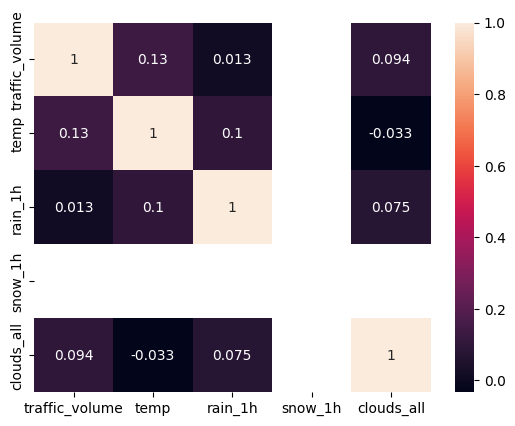

In [25]:
num_df=data[['traffic_volume','temp','rain_1h','snow_1h','clouds_all']]
sns.heatmap(num_df.corr(), annot=True)
plt.show()
#There is a very weak correlation between snow_1h and the rest of the features

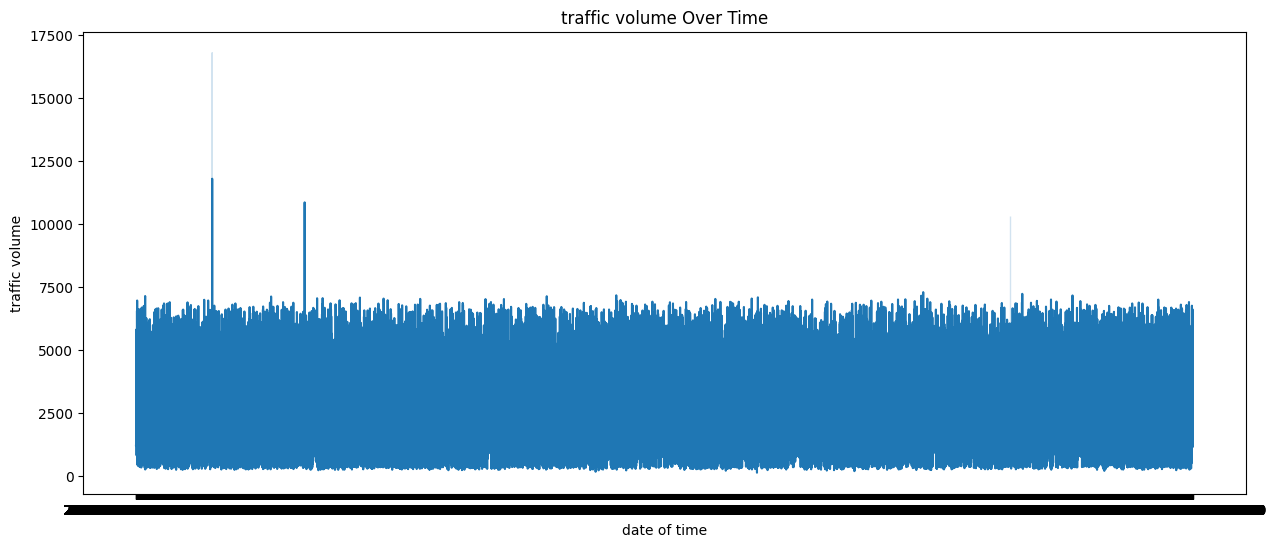

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.lineplot(x='date_time', y='traffic_volume', data=data)
plt.title('traffic volume Over Time')
plt.xlabel('date of time')
plt.ylabel('traffic volume')
plt.show()

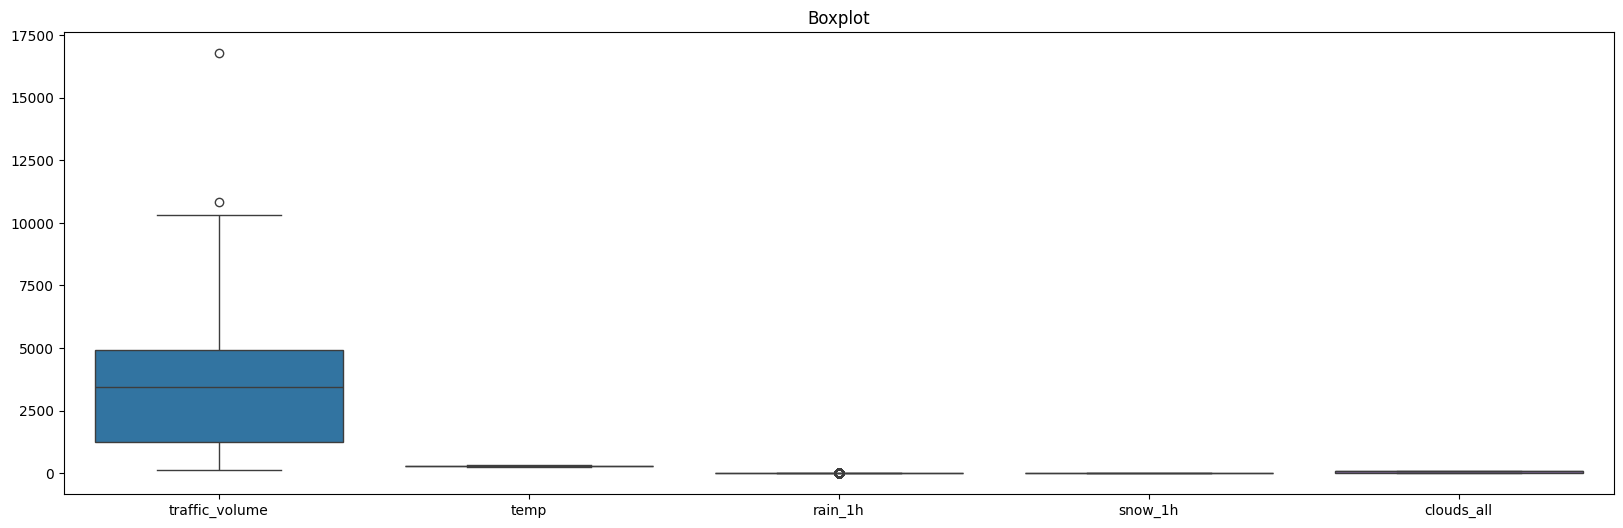

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.boxplot(data)
plt.title('Boxplot')
plt.show()


I first processed the data and then printed the seasonal_decompose.

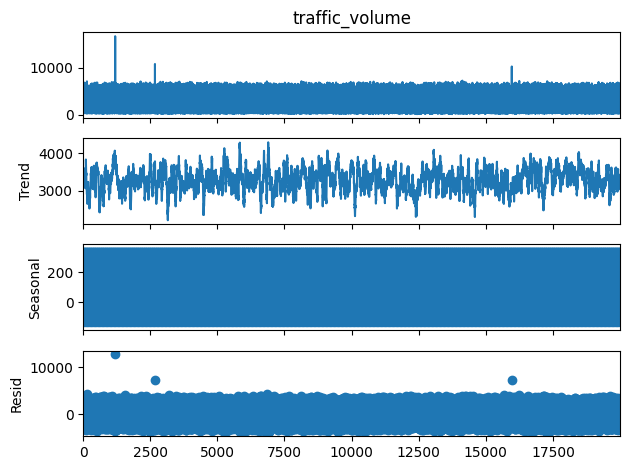

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal= seasonal_decompose(data['traffic_volume'], model ='additive', period=50)

seasonal.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [27]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [28]:
data.sort_values(by ='date_time' , inplace = True)

In [30]:
data.set_index(['date_time'], inplace=True)

In [31]:
data['traffic_volume'].fillna(data['traffic_volume'].mean(), inplace=True)

In [39]:
data.drop_duplicates(inplace= True)

In [36]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['weather_main'] = l.fit_transform(data['weather_main'])
data['weather_description'] = l.fit_transform(data['weather_description'])

In [37]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data =remove_outliers(data ,'traffic_volume')
data =remove_outliers(data ,'rain_1h')


In [40]:
data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,9
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,16
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,16
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,1,1
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,1,18
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,9,20


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [41]:
data['prev_traffic_volume'] = data['traffic_volume'].shift(5)

In [42]:
data['Differenctraffic_volume'] = data['traffic_volume'].diff()

In [43]:
data['day_of_the_week'] = data.index.dayofweek
data['month'] = data.index.month
data['day_of_year'] = data.index.dayofyear

In [89]:
data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Differenctraffic_volume,day_of_the_week,month,day_of_year
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,9,NaN,NaN,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4,NaN,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,16,NaN,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4,NaN,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,16,NaN,0.0,4,11,323
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,1,1,4380.0,-589.0,6,9,273
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,1,18,4302.0,-762.0,6,9,273
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,9,20,4302.0,-622.0,6,9,273


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19267 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   traffic_volume           19267 non-null  float64
 1   temp                     19267 non-null  float64
 2   rain_1h                  19267 non-null  float64
 3   snow_1h                  19267 non-null  float64
 4   clouds_all               19267 non-null  int64  
 5   weather_main             19267 non-null  int64  
 6   weather_description      19267 non-null  int64  
 7   prev_traffic_volume      19262 non-null  float64
 8   Differenctraffic_volume  19266 non-null  float64
 9   day_of_the_week          19267 non-null  int32  
 10  month                    19267 non-null  int32  
 11  day_of_year              19267 non-null  int32  
dtypes: float64(6), int32(3), int64(3)
memory usage: 1.7 MB


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [44]:
split = int(len(data) * 0.7)

train_data = data[    :split]
test_data = data[split:  ]

In [45]:
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Training data shape: (13486, 12)
Testing data shape: (5781, 12)


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [46]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
scaled_training_set = Scaler.fit_transform(train_data)
scaled_testing_set = Scaler.fit_transform(test_data)

In [49]:
import numpy as np
X_train = []
y_train = []
for i in range(30,2769):
    X_train.append(scaled_training_set[i-30:i,0])
    y_train.append(scaled_training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [96]:
X_test = []
y_test = []
for i in range(30,1142):
    X_test.append(scaled_testing_set[i-30:i,0])
    y_test.append(scaled_testing_set[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [97]:
import tensorflow as tf
tf.random.set_seed(5)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU, Dense ,Dropout

# **LSTM**

In [99]:
LSTM_model = Sequential([
    LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=150, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(units=200, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(units=150, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(units=100, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

LSTM_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 30, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 30, 150)             │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 30, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 30, 200)             │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 30, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 30, 150)             │         210,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 30, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 783,301 (2.99 MB)

 Trainable params: 783,301 (2.99 MB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [100]:
LSTM_model.compile(optimizer='adam',loss='mean_squared_error')

In [101]:
LSTM_model_prdiction=LSTM_model.fit(X_train,y_train,epochs=10,batch_size=32)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - loss: 0.0918
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - loss: 0.0620
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - loss: 0.0539
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - loss: 0.0488
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - loss: 0.0444
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - loss: 0.0427
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - loss: 0.0399
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - loss: 0.0357
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - loss: 0.0269
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - loss: 0.0214


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [102]:
LSTM_predicted_values = LSTM_model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, LSTM_predicted_values)
mse = mean_squared_error(y_test, LSTM_predicted_values)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)



MAE: 0.09141377616931144
MSE: 0.01254321503353176
RMSE: 0.11199649563058552


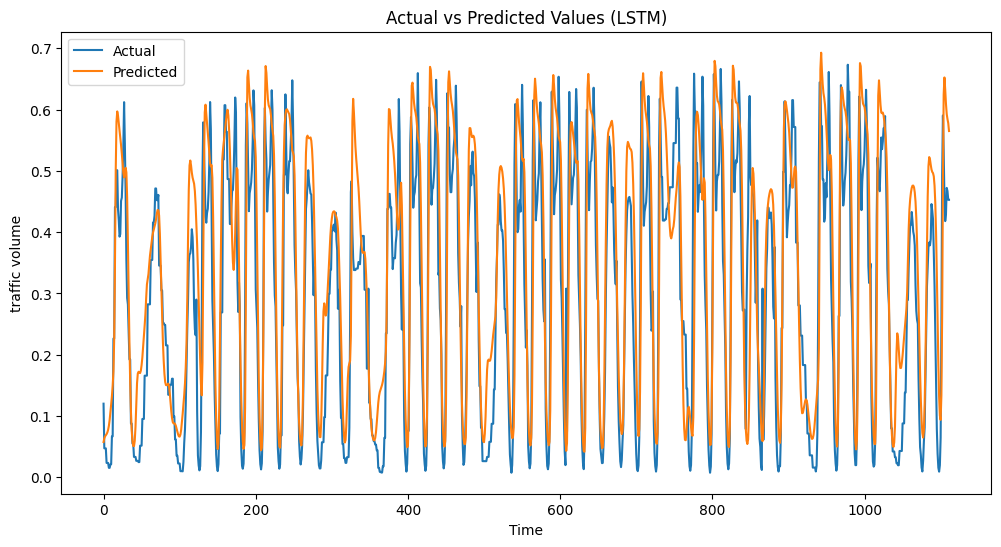

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(LSTM_predicted_values, label='Predicted')
plt.title('Actual vs Predicted Values (LSTM)')
plt.xlabel('Time')
plt.ylabel('traffic volume')
plt.legend()
plt.show()

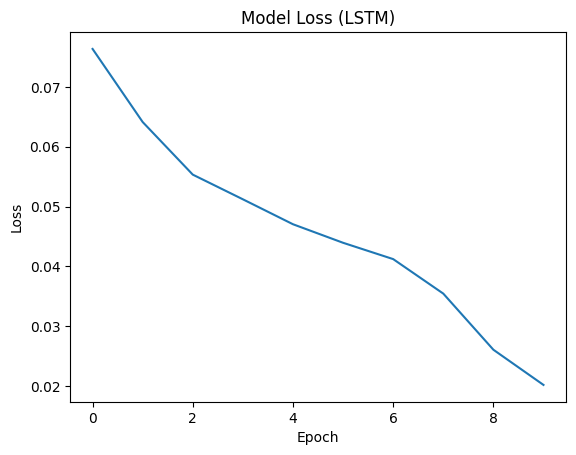

In [105]:
plt.plot(LSTM_model_prdiction.history['loss'])
plt.title('Model Loss (LSTM)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# **GRU**

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [106]:
GRU_model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
    Dropout(0.2),
    GRU(units=100, return_sequences=True),
    Dropout(0.2),
    GRU(units=150, return_sequences=True),
    Dropout(0.2),
    GRU(units=100, return_sequences=True),
    Dropout(0.2),
    GRU(units=50, activation='tanh'),
    Dropout(0.2),
    Dense(units=1)

])
GRU_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_9 (GRU)                          │ (None, 30, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_10 (GRU)                         │ (None, 30, 100)             │          45,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ (None, 30, 150)             │         113,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 30, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_12 (GRU)                         │ (None, 30, 100)             │          75,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_13 (GRU)                         │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,401 (1.01 MB)

 Trainable params: 265,401 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
GRU_model.compile(optimizer='adam',loss='mean_squared_error')

GRU_model_prdiction=GRU_model.fit(X_train,y_train,epochs=10,batch_size=150)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1083
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0484
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0297
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0257
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0214
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0184
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0131
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0122
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0111


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [108]:
GRU_predicted_values = GRU_model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, GRU_predicted_values)
mse = mean_squared_error(y_test, GRU_predicted_values)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.04972516213159785
MSE: 0.004461313413417717
RMSE: 0.06679306411161055


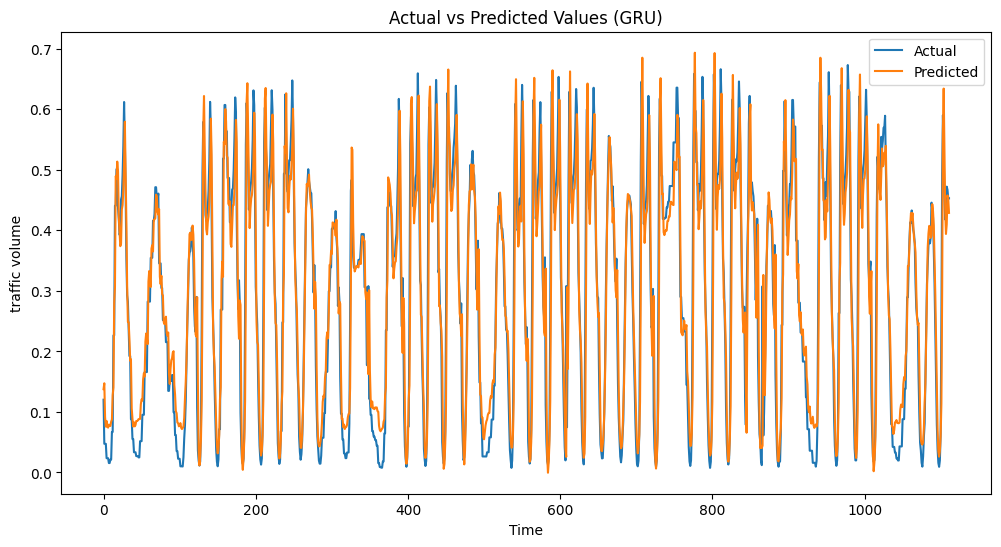

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(GRU_predicted_values, label='Predicted')
plt.title('Actual vs Predicted Values (GRU)')
plt.xlabel('Time')
plt.ylabel('traffic volume')
plt.legend()
plt.show()

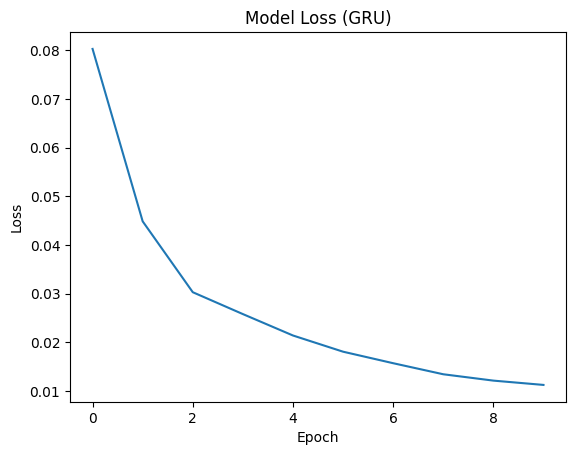

In [111]:
plt.plot(GRU_model_prdiction.history['loss'])
plt.title('Model Loss (GRU)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Before data processing, you performed a simple EDA on the data.


---


1- I first converted date_time to a date_time type and then ordered the data on it.
I indexed the dataset, filled in the missing values ​​in traffic_volume with mean, and ran LabelEncoder on weather_main and weather_description.
I did these things to make it easier to segment the data, predict traffic_volume, and make the data more consistent.




---
2- Yes, I did four new features and the benefit of them was that they provided additional information to the model.
Example: prev_traffic_volume helps to know the traffic volume of the previous day.


---

3- I used LSTM and GRU because they are good and effective at analyzing temporal patterns.
The LSTM consists of five layers with 100-200 cells and a ReLU activation function. After each layer, I used a 20% dropout to avoid overgeneralization and the last layer, Dense, has a single cell.
The GRU is very similar to the LSTM. It uses five layers with 50-150 cells and a tanh activation function.
After each layer, I used a 20% dropout to avoid overgeneralization and the last layer, Dense, has a single cell.


---
4-Batch Size: 32 , Epochs: 10 ,Optimizer: Adam,
These values ​​helped train and speed up the models


---
5- I used the three evaluation metrics because they help evaluate the accuracy of the model.


---

6- I initially set the batch value to 30 but changed it to 10 to reduce training time.



---
 7- Both LSTM and GRU perform well because the MAE and RMSE are low in both.



---

8- To improve it is possible to use other algorithms such as ARIMA, SARIMA.
